# Import Library and Load Data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from joblib import dump
import joblib

# Load data
url = "https://raw.githubusercontent.com/IrendraLintang/Diabtic/refs/heads/main/diabetes_data.csv"
df = pd.read_csv(url)

print(df.head())
df.info()

   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0       6000   44       0          1                    2               1   
1       6001   51       1          0                    1               2   
2       6002   89       1          0                    1               3   
3       6003   21       1          1                    1               2   
4       6004   27       1          0                    1               3   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...  \
0  32.985284        1            4.499365          2.443385  ...   
1  39.916764        0            1.578919          8.301264  ...   
2  19.782251        0            1.177301          6.103395  ...   
3  32.376881        1            1.714621          8.645465  ...   
4  16.808600        0           15.462549          4.629383  ...   

   TinglingHandsFeet  QualityOfLifeScore  HeavyMetalsExposure  \
0                  1           73.765109                    0  

## Cleaning data

In [2]:
df.isnull().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins                          0
AntidiabeticMedications          0
FrequentUrination                0
ExcessiveThirst                  0
UnexplainedWeightLoss            0
FatigueLevels                    0
BlurredVision                    0
SlowHealingSores                 0
TinglingHandsFeet                0
QualityOfLifeScore               0
HeavyMetalsExposure              0
OccupationalExposureChemicals    0
WaterQuality                     0
MedicalCheckupsFrequency         0
MedicationAdherence              0
HealthLiteracy                   0
Diagnosis                        0
DoctorInCharge                   0
dtype: int64

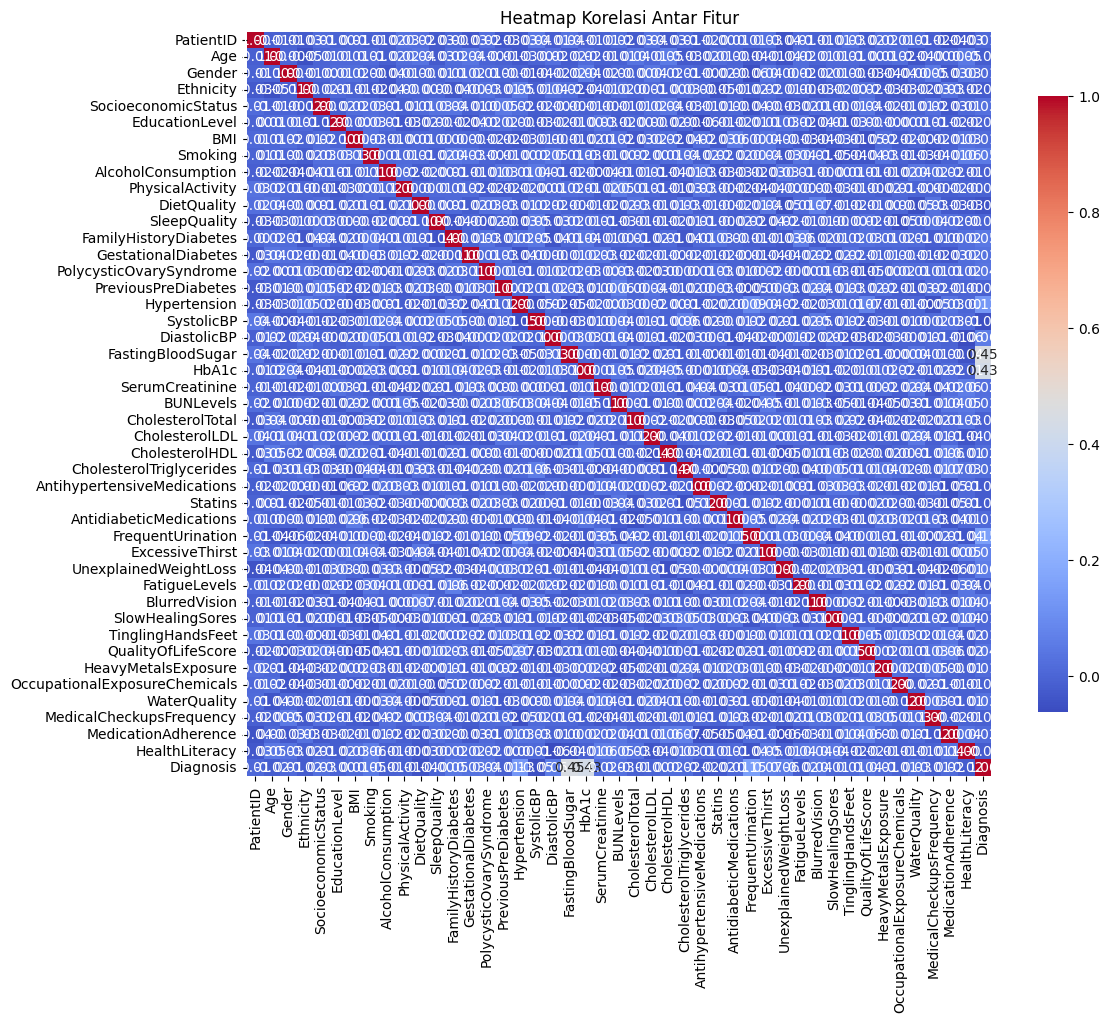

In [3]:
#drop string/object variable to check the weight
columns_to_drop = [
    'DoctorInCharge'
]
df_cleaned = df.drop(columns=columns_to_drop)
correlation_matrix = df_cleaned.corr()

# heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## Drop unnecessary feature

The following feature are the features that has a low weight so it is considered better not to use it because it does not have a high impact

In [4]:
columns_to_drop = [
    'PatientID',
    'Ethnicity',
    'SocioeconomicStatus',
    'EducationLevel',
    'PolycysticOvarySyndrome',
    'SerumCreatinine',
    'BUNLevels',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides',
    'Statins',
    'DoctorInCharge'
]

df_cleaned = df.drop(columns=columns_to_drop)

In [5]:
df_cleaned.describe().T

count        mean        std         min  \
Age                            1879.0   55.043108  20.515839   20.000000   
Gender                         1879.0    0.487493   0.499977    0.000000   
BMI                            1879.0   27.687601   7.190975   15.025898   
Smoking                        1879.0    0.281533   0.449866    0.000000   
AlcoholConsumption             1879.0   10.096587   5.914216    0.000928   
PhysicalActivity               1879.0    5.200790   2.857012    0.004089   
DietQuality                    1879.0    4.895801   2.867144    0.000885   
SleepQuality                   1879.0    7.021328   1.729469    4.004336   
FamilyHistoryDiabetes          1879.0    0.238425   0.426234    0.000000   
GestationalDiabetes            1879.0    0.099521   0.299440    0.000000   
PreviousPreDiabetes            1879.0    0.153805   0.360858    0.000000   
Hypertension                   1879.0    0.153273   0.360346    0.000000   
SystolicBP                     1879.0  134.050559  25.613830   90.000000   
DiastolicBP                    1879.0   89.863757  17.328086   60.000000   
FastingBloodSugar              1879.0  135.204490  37.515750   70.074649   
HbA1c                          1879.0    6.976133   1.739365    4.003089   
CholesterolTotal               1879.0  225.006464  43.367170  150.056094   
AntihypertensiveMedications    1879.0    0.285790   0.451910    0.000000   
AntidiabeticMedications        1879.0    0.278340   0.448301    0.000000   
FrequentUrination              1879.0    0.197445   0.398177    0.000000   
ExcessiveThirst                1879.0    0.193188   0.394904    0.000000   
UnexplainedWeightLoss          1879.0    0.109633   0.312515    0.000000   
FatigueLevels                  1879.0    4.949003   2.884483    0.004977   
BlurredVision                  1879.0    0.095263   0.293657    0.000000   
SlowHealingSores               1879.0    0.102714   0.303666    0.000000   
TinglingHandsFeet              1879.0    0.111229   0.314500    0.000000   
QualityOfLifeScore             1879.0   48.508643  28.758488    0.002390   
HeavyMetalsExposure            1879.0    0.052155   0.222400    0.000000   
OccupationalExposureChemicals  1879.0    0.103246   0.304361    0.000000   
WaterQuality                   1879.0    0.200639   0.400585    0.000000   
MedicalCheckupsFrequency       1879.0    1.997101   1.122632    0.004013   
MedicationAdherence            1879.0    4.957539   2.910934    0.005384   
HealthLiteracy                 1879.0    5.011736   2.920908    0.000362   
Diagnosis                      1879.0    0.400213   0.490072    0.000000   

                                      25%         50%         75%         max  
Age                             38.000000   55.000000   73.000000   90.000000  
Gender                           0.000000    0.000000    1.000000    1.000000  
BMI                             21.469981   27.722988   33.856460   39.998811  
Smoking                          0.000000    0.000000    1.000000    1.000000  
AlcoholConsumption               4.789725   10.173865   15.285359   19.996231  
PhysicalActivity                 2.751022    5.249002    7.671402    9.993893  
DietQuality                      2.476802    4.888566    7.356058    9.998677  
SleepQuality                     5.481789    7.094692    8.523814    9.989372  
FamilyHistoryDiabetes            0.000000    0.000000    0.000000    1.000000  
GestationalDiabetes              0.000000    0.000000    0.000000    1.000000  
PreviousPreDiabetes              0.000000    0.000000    0.000000    1.000000  
Hypertension                     0.000000    0.000000    0.000000    1.000000  
SystolicBP                     112.000000  134.000000  156.000000  179.000000  
DiastolicBP                     75.000000   90.000000  105.000000  119.000000  
FastingBloodSugar              102.341470  137.398241  167.362362  199.935506  
HbA1c                            5.443856    7.095732    8.423211    9.991193  
Cholesterol

# Data Distribution

# Check the Diagnosis variable distribution

<ipython-input-6-18ea4a3b735a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


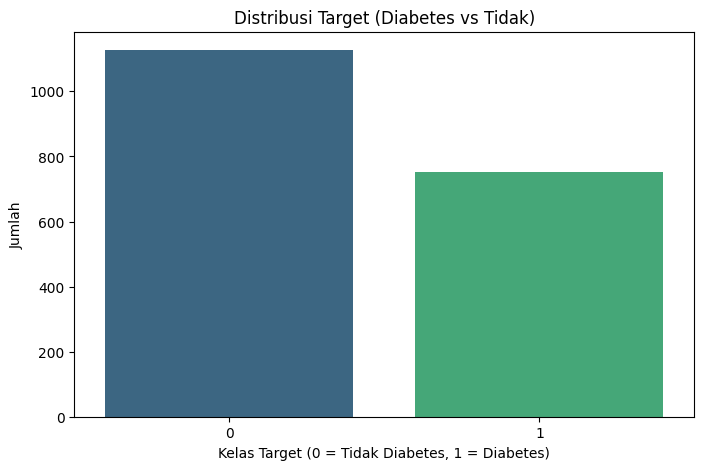

Distribusi Target:
Diagnosis
0    1127
1     752
Name: count, dtype: int64


In [6]:
X = df_cleaned.drop(columns=['Diagnosis'])
y = df_cleaned['Diagnosis']

plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribusi Target (Diabetes vs Tidak)")
plt.xlabel("Kelas Target (0 = Tidak Diabetes, 1 = Diabetes)")
plt.ylabel("Jumlah")
plt.show()

print("Distribusi Target:")
print(y.value_counts())

## Data distribution through the age, BMI, gender.

<ipython-input-7-1e923481a277>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Gender', palette='Set2')


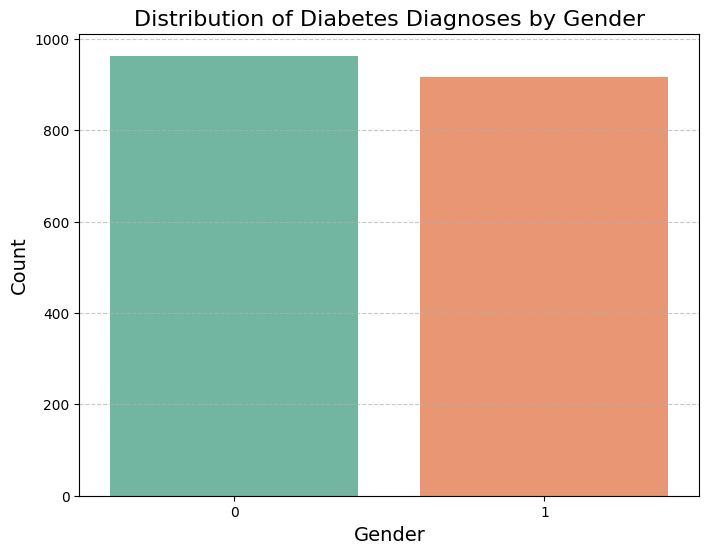

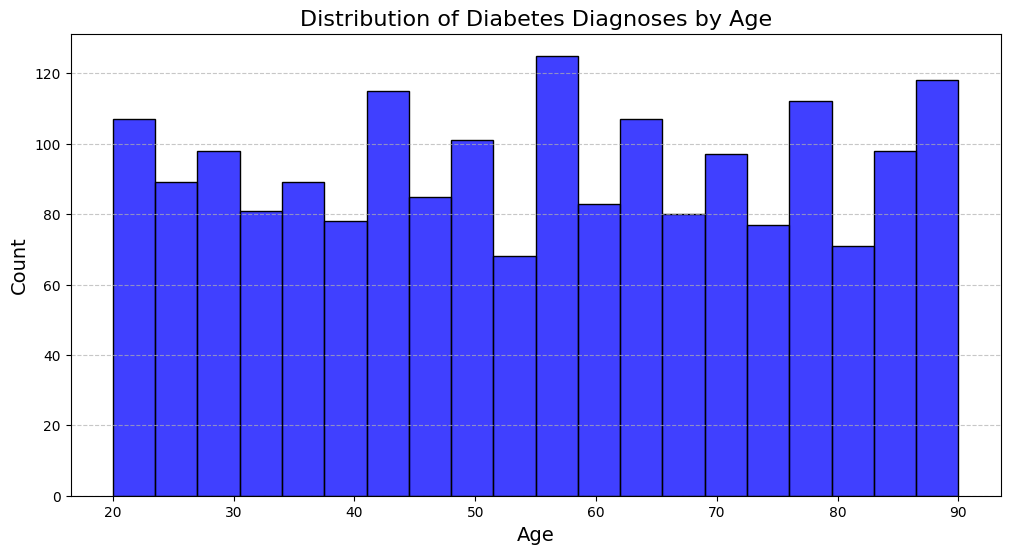

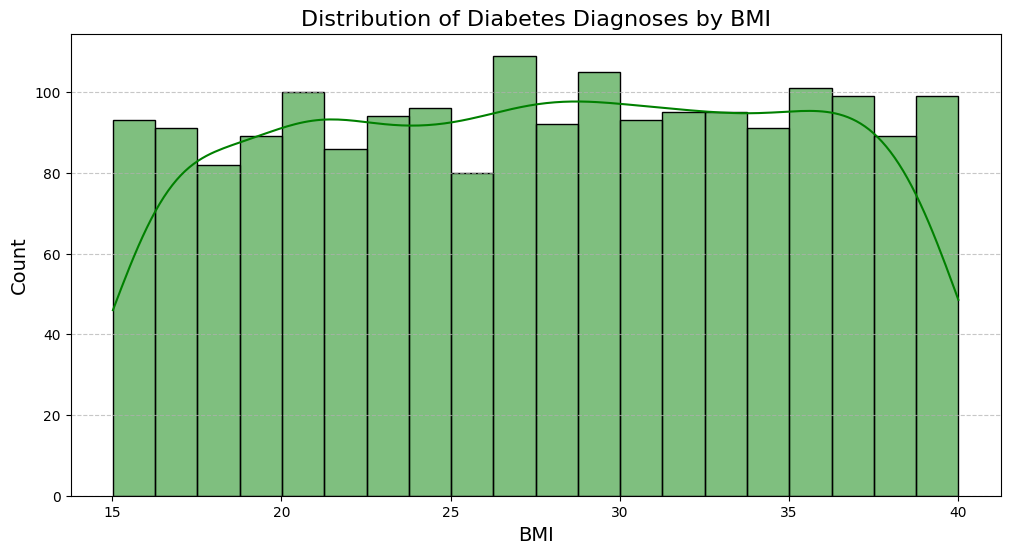

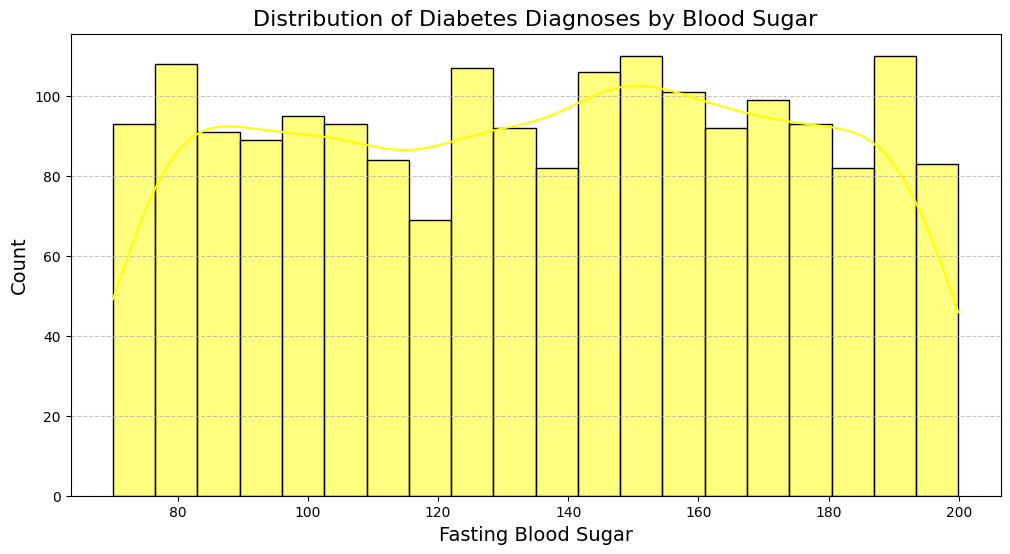

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Gender', palette='Set2')
plt.title('Distribution of Diabetes Diagnoses by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='Age', bins=20, kde=False, color='blue')
plt.title('Distribution of Diabetes Diagnoses by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='BMI', bins=20, kde=True, color='green')
plt.title('Distribution of Diabetes Diagnoses by BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='FastingBloodSugar', bins=20, kde=True, color='yellow')
plt.title('Distribution of Diabetes Diagnoses by Blood Sugar', fontsize=16)
plt.xlabel('Fasting Blood Sugar', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization of Correlation Between Features

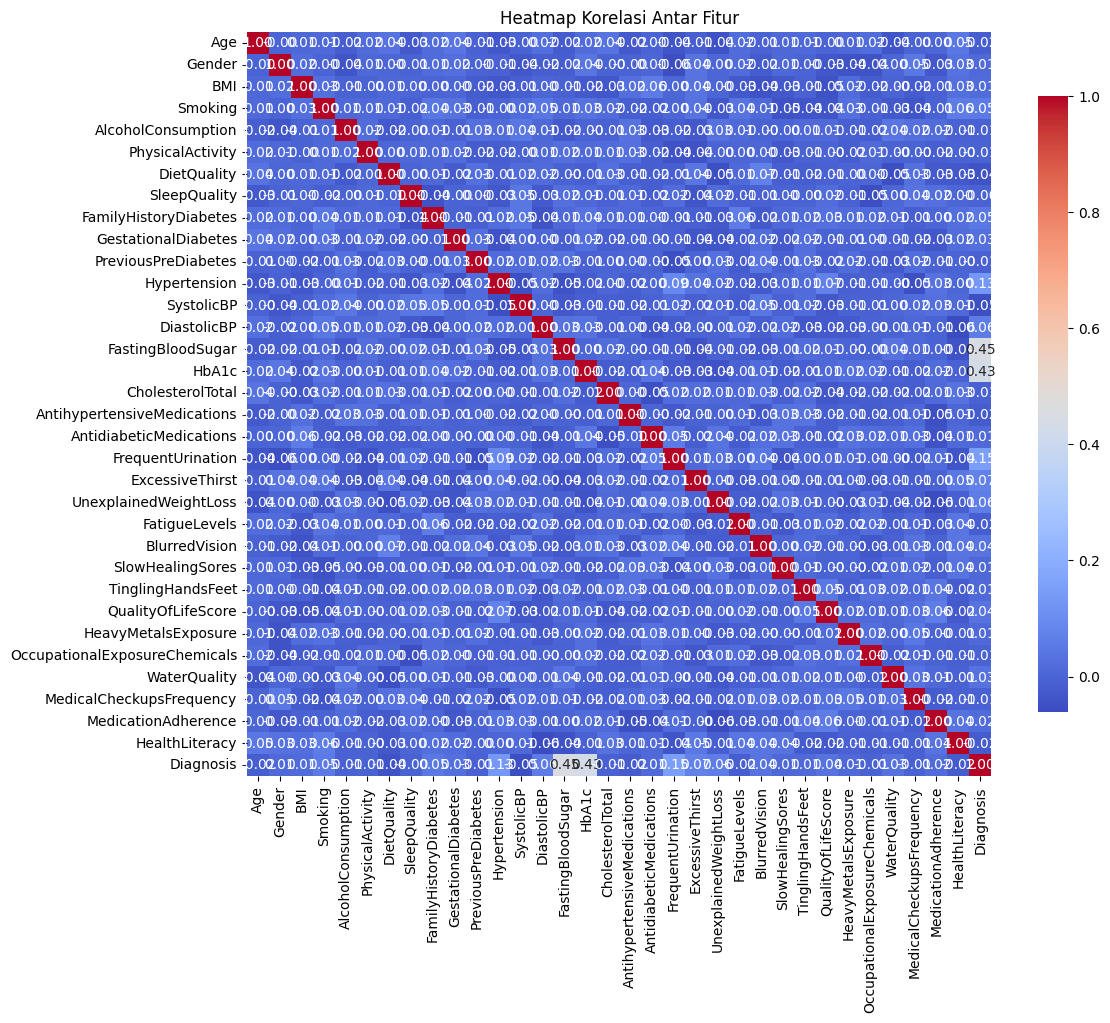

In [8]:
# correlation
correlation_matrix = df_cleaned.corr()

# heatmap Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


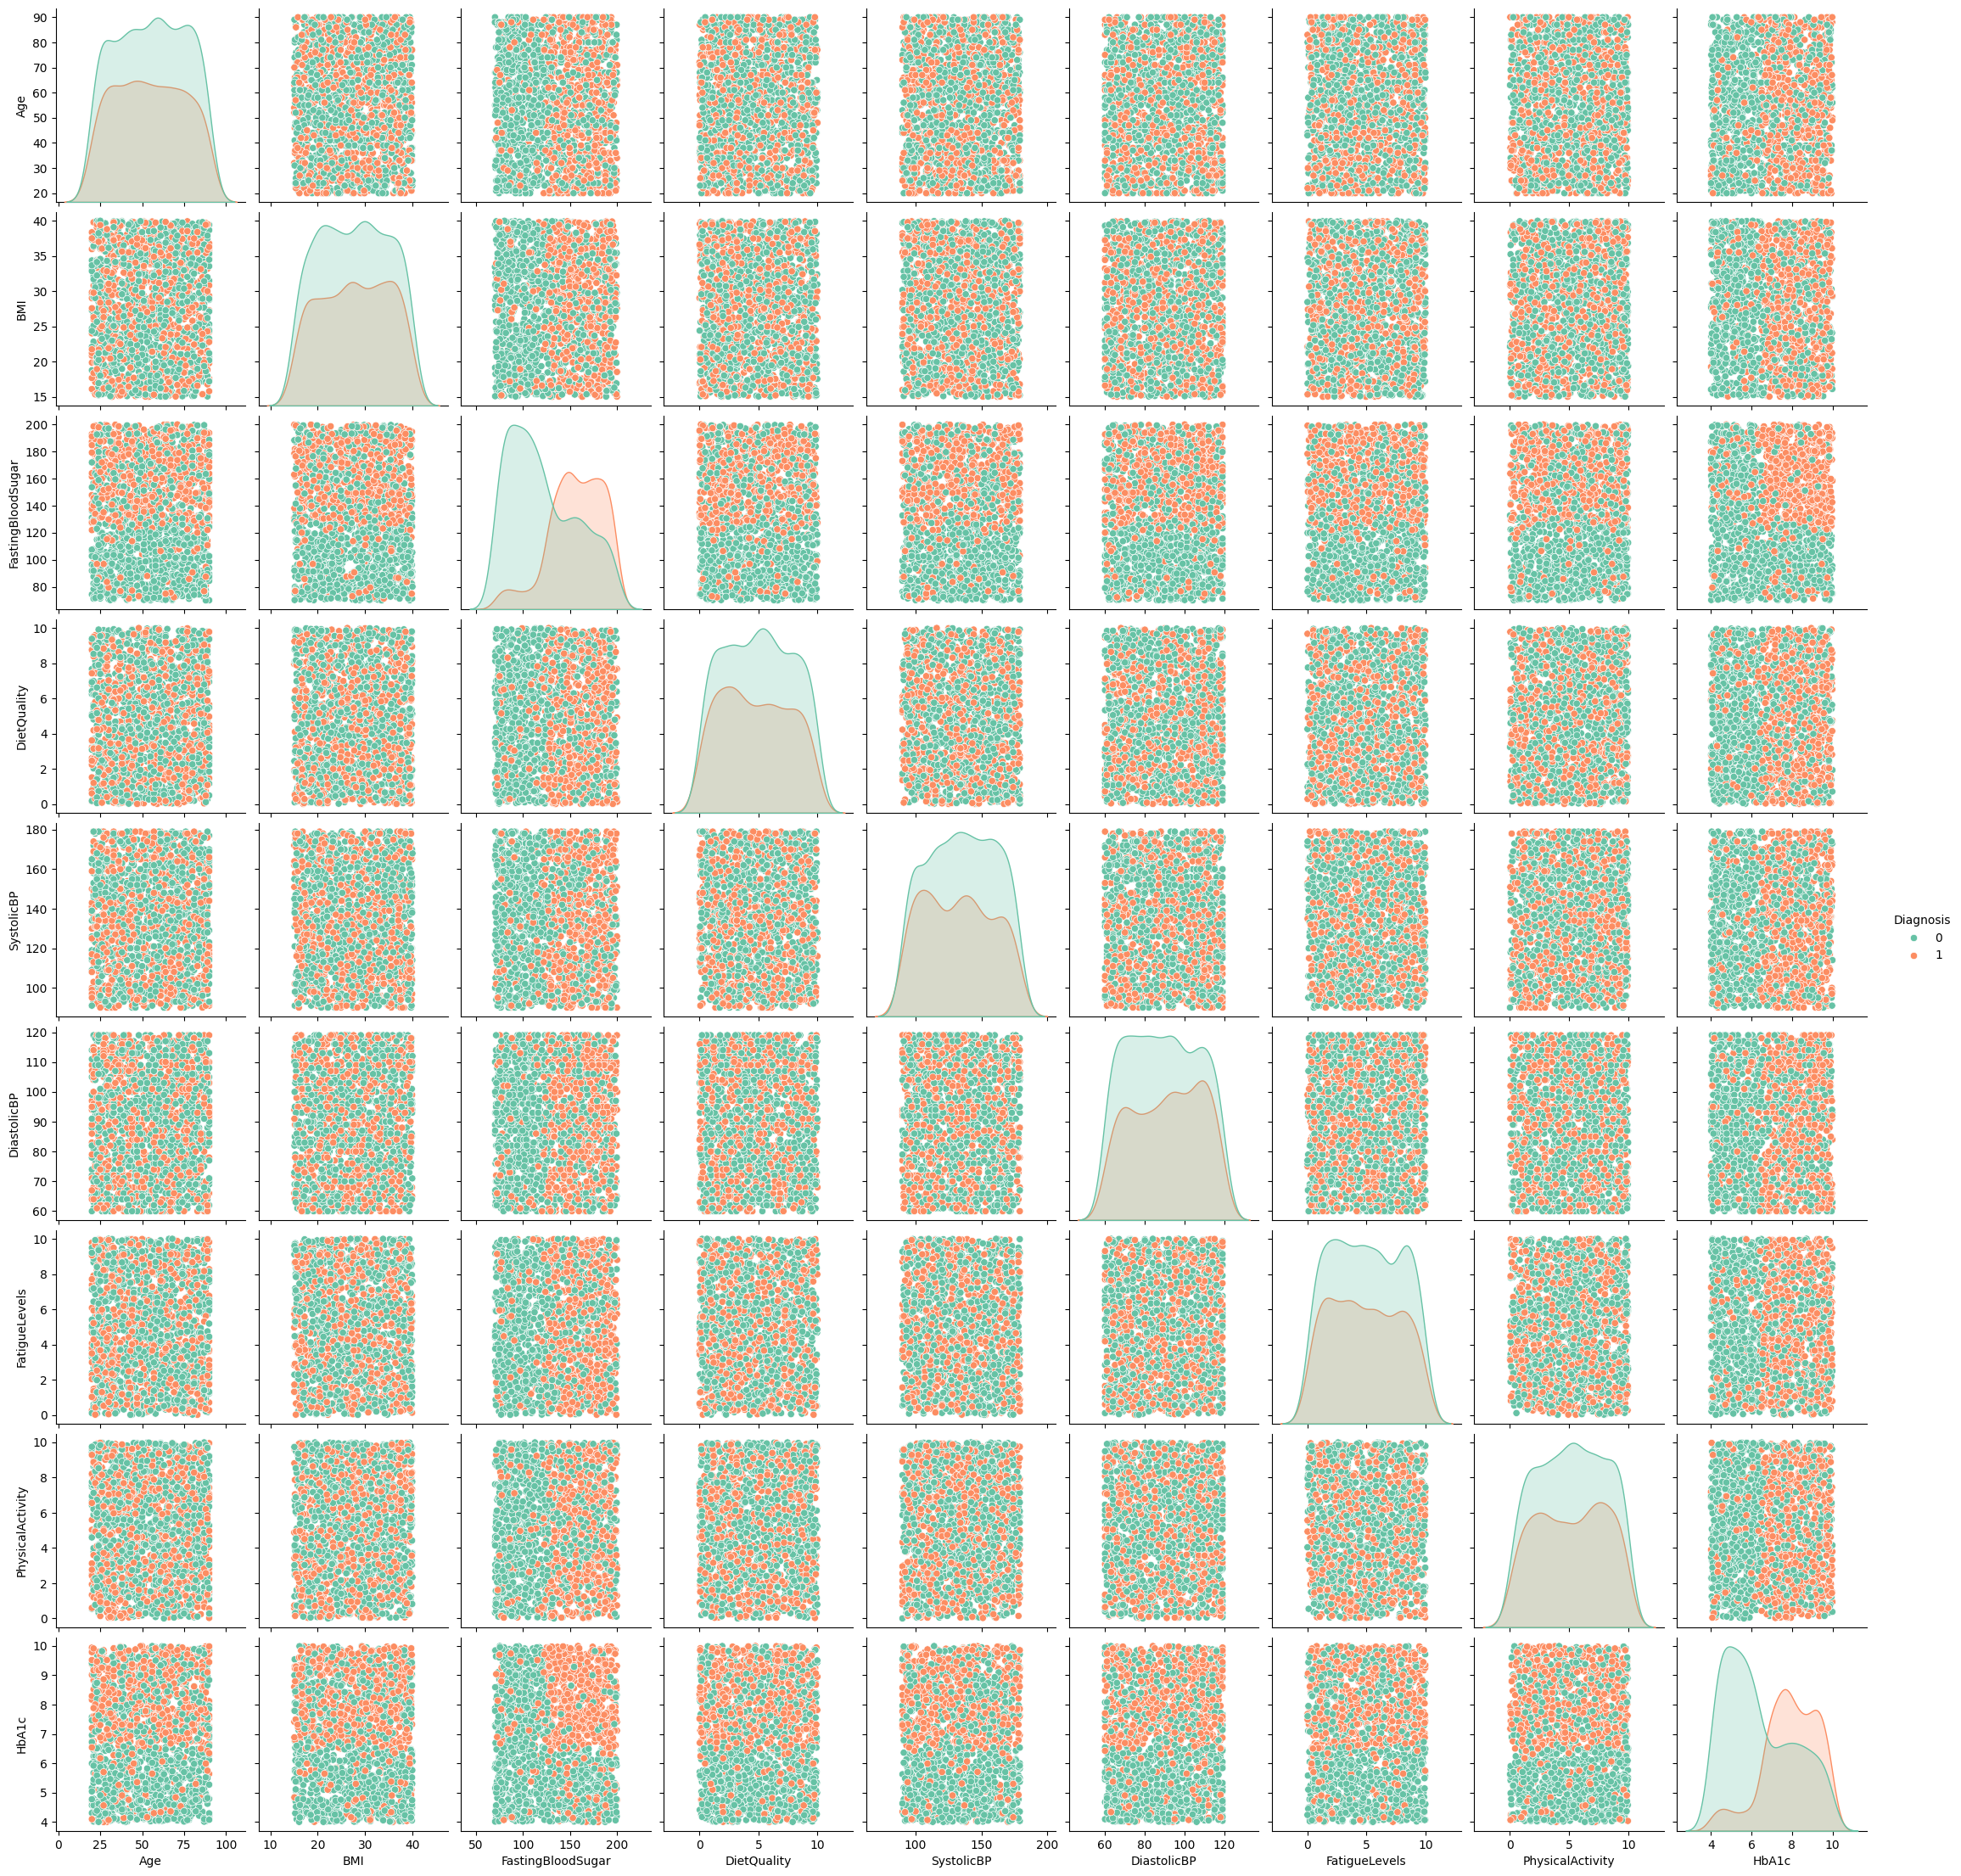

In [9]:
selected_features = [
    'Age',                # Usia
    'BMI',                # Indeks Massa Tubuh
    'FastingBloodSugar',  # Gula darah puasa
    'DietQuality',
    'SystolicBP',         # Tekanan darah sistolik
    'DiastolicBP',        # Tekanan darah diastolik
    'FatigueLevels',      # Tingkat kelelahan
    'PhysicalActivity',
    'HbA1c',
    'Diagnosis'           # Diagnosis (target)
]
sns.pairplot(df_cleaned[selected_features], hue='Diagnosis', palette='Set2', diag_kind='kde')
plt.show()

# Building Model

In [10]:
X = df_cleaned.drop(columns=['Diagnosis'])
y = df_cleaned['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DNN

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5854 - loss: 0.6686 - val_accuracy: 0.7128 - val_loss: 0.6039
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6993 - loss: 0.5882 - val_accuracy: 0.7394 - val_loss: 0.5297
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7613 - loss: 0.5155 - val_accuracy: 0.7739 - val_loss: 0.4643
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4310 - val_accuracy: 0.7952 - val_loss: 0.4321
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.4074 - val_accuracy: 0.8005 - val_loss: 0.4129
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8270 - loss: 0.4080 - val_accuracy: 0.8032 - val_loss: 0.4038
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.3850 - val_accuracy: 0.8005 - val_loss: 0.4073
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8315 - loss: 0.3654 - val_accuracy: 0.8165 - val_loss:

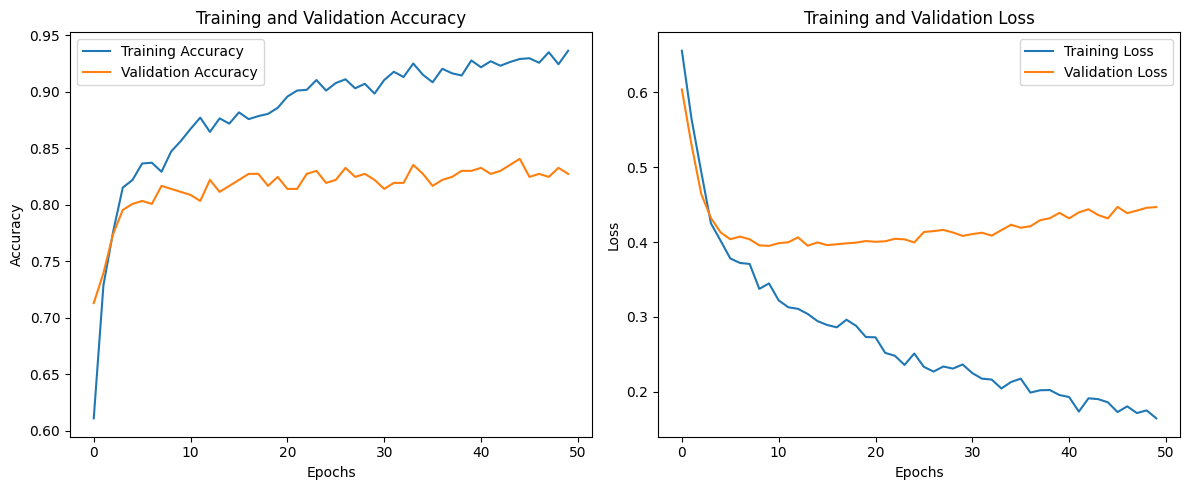

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Model evaluation on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Akurasi pada data uji: {accuracy:.4f}")

# Manual prediction and accuracy
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
manual_accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi manual: {manual_accuracy:.4f}")

# Accuracy and Loss graph during training
plt.figure(figsize=(12, 5))

# Accuration
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 0.9175531914893617
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       233
           1       0.95      0.83      0.88       143

    accuracy                           0.92       376
   macro avg       0.93      0.90      0.91       376
weighted avg       0.92      0.92      0.92       376



# XGBoost

In [13]:
# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', verbosity=0)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("Akurasi XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_xgb))

Akurasi XGBoost: 0.925531914893617
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       233
           1       0.95      0.85      0.90       143

    accuracy                           0.93       376
   macro avg       0.93      0.91      0.92       376
weighted avg       0.93      0.93      0.92       376



# SVM

In [14]:
# SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_svm))


Akurasi SVM: 0.8324468085106383
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       233
           1       0.79      0.76      0.77       143

    accuracy                           0.83       376
   macro avg       0.82      0.82      0.82       376
weighted avg       0.83      0.83      0.83       376



# Ensemble Learning (Soft Voting)

Combining the prediction probabilities from all models and taking the average as the final decision.

In [18]:
# Probability of each model
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
dnn_probs = model.predict(X_test_scaled).flatten()

# Soft voting
combined_probs = (rf_probs + xgb_probs + svm_probs + dnn_probs) / 4
final_predictions = (combined_probs > 0.5).astype(int)

# Evaluation of ensemble results
print("Akurasi Ensemble:", accuracy_score(y_test, final_predictions))
print("Laporan Klasifikasi:\n", classification_report(y_test, final_predictions))


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Akurasi Ensemble: 0.9122340425531915
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       233
           1       0.92      0.85      0.88       143

    accuracy                           0.91       376
   macro avg       0.91      0.90      0.91       376
weighted avg       0.91      0.91      0.91       376



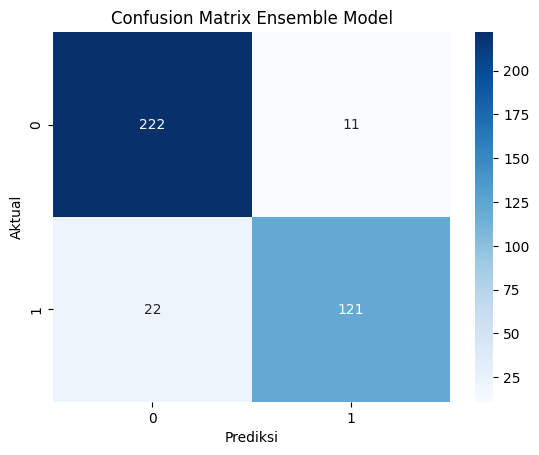

In [19]:
conf_matrix = confusion_matrix(y_test, final_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Ensemble Model')
plt.show()


In [23]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
dump(rf_model, 'rf_model.pkl')

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', verbosity=0)
xgb_model.fit(X_train_scaled, y_train)
dump(xgb_model, 'xgb_model.pkl')

# SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)
dump(svm_model, 'svm_model.pkl')

# DNN
model.save('dnn_model.h5')

In [24]:
# Load individual models
rf_model = joblib.load('rf_model.pkl')
xgb_model = joblib.load('xgb_model.pkl')
svm_model = joblib.load('svm_model.pkl')
dnn_model = tf.keras.models.load_model('dnn_model.h5')

# Create an external prediction function
def external_models_prediction(inputs):
    rf_probs = rf_model.predict_proba(inputs)[:, 1]
    xgb_probs = xgb_model.predict_proba(inputs)[:, 1]
    svm_probs = svm_model.predict_proba(inputs)[:, 1]
    return np.column_stack((rf_probs, xgb_probs, svm_probs)).astype(np.float32)

# Ensemble Layer for DNN
class EnsembleLayer(tf.keras.layers.Layer):
    def __init__(self, dnn_model, **kwargs):
        super(EnsembleLayer, self).__init__(**kwargs)
        self.dnn_model = dnn_model

    def call(self, inputs):
        non_dnn_probs = tf.numpy_function(external_models_prediction, [inputs], tf.float32)
        dnn_probs = tf.squeeze(self.dnn_model(inputs))
        combined_probs = (non_dnn_probs[:, 0] + non_dnn_probs[:, 1] + non_dnn_probs[:, 2] + dnn_probs) / 4
        return tf.expand_dims(tf.cast(combined_probs > 0.5, tf.int32), axis=-1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1)

    def get_config(self):
        config = super().get_config()
        config.update({"dnn_model": self.dnn_model})
        return config

# Create Keras ensemble models
ensemble_input = tf.keras.Input(shape=(X_train_scaled.shape[1],))
ensemble_output = EnsembleLayer(dnn_model)(ensemble_input)
ensemble_model = tf.keras.Model(inputs=ensemble_input, outputs=ensemble_output)

# Save model as HDF5 (.h5)
ensemble_model.save('ensemble_model.h5')
